In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch

# Logreg, that achieved highest open test score

In [3]:
df1 = pd.read_pickle('train_part1.pkl')
df1.head()

,REPORT_DT,x_0,x_1,x_2,x_3,x_4,x_5,x_7,x_9,x_10,...,x_639,x_640,x_641,x_642,x_643,x_644,x_645,x_646,TARGET,ID
0,2019-08-25,1,0,1,1,2100000.0,1505828.87,1505828.87,2017-03-20,1400000.0,...,11.75,0.436268,0.436268,40.257001,28,22757.85,0.505730,0.716184,0,0
1,2019-06-27,1,0,1,1,900000.0,363535.29,363535.29,2017-02-02,900000.0,...,12.25,0.321785,0.321785,12.000000,28,20133.89,0.268452,0.268452,0,1
2,2018-01-09,1,0,1,1,1000000.0,990956.71,982069.19,2017-09-20,1000000.0,...,7.90,0.284704,0.284704,NaN,4,15536.44,0.154156,0.348582,0,2
3,2019-09-03,1,0,1,1,1400000.0,566338.60,564045.39,2015-02-06,1400000.0,...,15.75,0.274333,0.274333,16.470588,55,20318.31,0.239039,0.239039,0,3
4,2017-12-18,1,0,1,1,2114500.0,1414693.51,1396391.57,2014-10-13,1700000.0,...,13.00,0.382492,0.382492,16.700842,36,24772.97,0.190561,0.238575,0,4


In [4]:
df2 = pd.read_pickle('train_part2.pkl')
df2.head()

,REPORT_DT,x_0,x_1,x_2,x_3,x_4,x_5,x_7,x_9,x_10,...,x_639,x_640,x_641,x_642,x_643,x_644,x_645,x_646,TARGET,ID
971632,2018-11-29,1,0,1,1,1586000.0,370525.32,370525.32,2017-08-02,1600000.0,...,9.0,0.519917,0.519917,57.786131,14,14269.65,0.150207,0.515368,1,971632
971633,2018-03-12,1,0,1,1,2892000.0,828797.94,827507.87,2014-07-28,2892000.0,...,13.5,0.370445,0.370445,31.780198,43,33710.45,0.293134,0.396594,0,971633
971634,2019-03-31,1,0,1,1,1242200.0,683018.20,683018.20,2016-04-29,2200000.0,...,12.0,0.276360,0.276360,16.185670,35,17821.96,0.133000,0.131118,0,971634
971635,2017-11-19,1,0,1,1,405000.0,326739.23,326739.23,2016-06-28,405000.0,...,14.5,0.119566,0.119566,NaN,16,9528.95,0.105877,0.119566,0,971635
971636,2019-06-03,1,0,1,1,680000.0,608045.43,608045.43,2017-08-19,680000.0,...,8.9,0.347095,0.347095,NaN,20,8577.19,0.276684,0.347095,0,971636


In [5]:
df_test = pd.read_pickle('test_data.pkl')
df_test.head()

,REPORT_DT,x_0,x_1,x_2,x_3,x_4,x_5,x_7,x_9,x_10,...,x_638,x_639,x_640,x_641,x_642,x_643,x_644,x_645,x_646,ID
1943531,2019-09-01,1,0,1,1,1100000.0,157773.90,157773.90,2014-10-25,1000000.0,...,0.0,13.75,0.530767,0.530767,34.517588,58,16914.35,0.583844,0.583844,1943531
1943532,2017-12-18,1,0,1,1,2580000.0,2187426.61,2183868.19,2017-08-17,2600000.0,...,0.0,9.00,0.735124,0.735124,71.603967,3,23212.93,0.356027,0.633954,1943532
1943533,2019-04-24,1,0,1,1,1200000.0,385763.26,218655.96,2013-02-07,1200000.0,...,0.0,14.00,0.858073,0.858073,NaN,73,18631.97,0.388166,0.858072,1943533
1943534,2017-05-15,1,0,1,1,637500.0,595369.13,595369.13,2015-11-16,637500.0,...,0.0,14.45,0.268572,0.268572,NaN,17,10071.45,0.402858,0.268572,1943534
1943537,2019-03-10,1,0,1,1,1232500.0,1118118.29,1118118.29,2014-03-24,1870000.0,...,15000.0,13.50,0.651646,0.651646,56.539372,56,14366.57,0.287331,0.471809,1943537


In [6]:
df = df1.append(df2)
df.shape

(1527598, 648)

In [7]:
from pandarallel import pandarallel
pandarallel.initialize(nb_workers = 32)

INFO: Pandarallel will run on 32 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [8]:
def nans_counter_row(x):
    return x.isna().sum()

In [9]:
df['NnansParall'] = df.parallel_apply(nans_counter_row, axis=1)

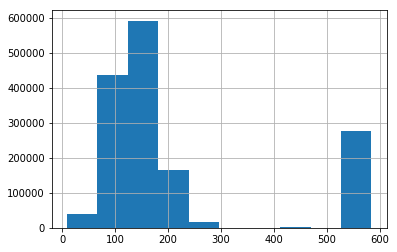

In [10]:
df['NnansParall'].hist()

In [11]:
nn = df.isna().sum()

In [12]:
features_dict = dict(zip(df.columns, nn))


In [13]:
columns_to_drop = {}

for elem in features_dict:
    if features_dict[elem]>=df1.shape[0]:
        columns_to_drop[elem] = features_dict[elem]
        #features_to_drop.append(features_dict[elem].keys())
        

In [14]:
features_to_drop = columns_to_drop.keys()
features_to_drop

#these features has more nans than no nans

dict_keys(['x_17', 'x_25', 'x_26', 'x_27', 'x_29', 'x_30', 'x_32', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_60', 'x_61', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_76', 'x_77', 'x_78', 'x_100', 'x_101', 'x_102', 'x_103', 'x_104', 'x_105', 'x_106', 'x_107', 'x_111', 'x_112', 'x_113', 'x_114', 'x_115', 'x_116', 'x_117', 'x_118', 'x_122', 'x_123', 'x_128', 'x_129', 'x_130', 'x_132', 'x_135', 'x_142', 'x_143', 'x_164', 'x_166', 'x_171', 'x_172', 'x_173', 'x_174', 'x_175', 'x_176', 'x_177', 'x_203', 'x_204', 'x_205', 'x_206', 'x_207', 'x_208', 'x_209', 'x_210', 'x_214', 'x_215', 'x_216', 'x_217', 'x_218', 'x_219', 'x_220', 'x_221', 'x_225', 'x_226', 'x_231', 'x_232', 'x_233', 'x_245', 'x_246', 'x_278', 'x_279', 'x_306', 'x_307', 'x_308', 'x_309', 'x_310', 'x_311', 'x_312', 'x_313', 'x_317', 'x_318', 'x_319', 'x_320', 'x_321', 'x_322', 'x_323', 'x_324', 'x_328', 'x_329', 'x_334', 'x_335', 'x_336', 'x_34

## Feature selection was significantly based on baseline and morning results in dataset observation (some meaningful int/float columns and almost all object columns)

In [16]:
df.select_dtypes('object') #

,x_12,x_13,x_17,x_18,x_19,x_21,x_25,x_26,x_27,x_614,x_615,x_617,x_618,x_625,x_628,x_634
0,B1,4,None,Пн,1,Приобретение,None,None,None,1,1,4,Приобретение,living in city in apart,ЗП,0
1,B1,4,None,Чт,1,Приобретение,None,None,None,0,1,4,Приобретение,other,ЗП,0
2,D,1,None,Ср,0,Инвестирование,None,None,None,1,0,1,Инвестирование,living in city in apart,Улица,1
3,N,4,None,Пт,0,Приобретение,None,None,None,1,0,4,Приобретение,living in city in apart,Улица,1
4,A,1,None,Пн,0,Инвестирование,None,None,None,1,0,1,Инвестирование,living in city in apart,Сотрудники,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1943522,D,1,None,Пн,0,Инвестирование,None,None,None,1,0,1,Инвестирование,living in city in apart,Улица,0
1943523,B1,4,None,Пн,1,Приобретение,None,None,None,0,1,4,Приобретение,other,ЗП,0
1943525,D,4,None,Пн,0,Приобретение,None,None,None,0,0,4,Приобретение,other,Улица,0
1943526,B1,4,None,Вт,0,Приобретение,None,None,None,1,0,4,Приобретение,living in city in apart,ЗП,0


In [15]:
features_to_drop = ['x_17', 'x_25', 'x_26', 'x_27', 'x_29', 'x_30', 'x_32', 'x_36', 'x_37', 'x_38', 'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_60', 'x_61', 'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70', 'x_71', 'x_72', 'x_73', 'x_74', 'x_76', 'x_77', 'x_78', 'x_100', 'x_101', 'x_102', 'x_103', 'x_104', 'x_105', 'x_106', 'x_107', 'x_111', 'x_112', 'x_113', 'x_114', 'x_115', 'x_116', 'x_117', 'x_118', 'x_122', 'x_123', 'x_128', 'x_129', 'x_130', 'x_132', 'x_135', 'x_142', 'x_143', 'x_164', 'x_166', 'x_171', 'x_172', 'x_173', 'x_174', 'x_175', 'x_176', 'x_177', 'x_203', 'x_204', 'x_205', 'x_206', 'x_207', 'x_208', 'x_209', 'x_210', 'x_214', 'x_215', 'x_216', 'x_217', 'x_218', 'x_219', 'x_220', 'x_221', 'x_225', 'x_226', 'x_231', 'x_232', 'x_233', 'x_245', 'x_246', 'x_278', 'x_279', 'x_306', 'x_307', 'x_308', 'x_309', 'x_310', 'x_311', 'x_312', 'x_313', 'x_317', 'x_318', 'x_319', 'x_320', 'x_321', 'x_322', 'x_323', 'x_324', 'x_328', 'x_329', 'x_334', 'x_335', 'x_336', 'x_343', 'x_344', 'x_345', 'x_346', 'x_349', 'x_351', 'x_353', 'x_355', 'x_356', 'x_357', 'x_358', 'x_361', 'x_362', 'x_363', 'x_364', 'x_365', 'x_366', 'x_367', 'x_368', 'x_369', 'x_370', 'x_372', 'x_463', 'x_490', 'x_491', 'x_492', 'x_493', 'x_494', 'x_495', 'x_496', 'x_497', 'x_498', 'x_499', 'x_540', 'x_541', 'x_543', 'x_546', 'x_548', 'x_549', 'x_550', 'x_551', 'x_609']

In [17]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
def cat_to_le(df, categs):
    for cat in tqdm(categs):
        inv = df[cat]
        #inv.value_counts()

 
        le = preprocessing.LabelEncoder()
        le.fit(inv)
        q = le.transform(df[cat])
        df[cat] = q
        df[cat]= df[cat].astype('int64')
    return df

In [18]:
def dataset_preproc(df, features_to_drop = features_to_drop):
    
    df = df.drop(columns = features_to_drop, axis = 1)
    for column in ['x_19', 'x_614', 'x_615', 'x_617', 'x_634']:
        pd.to_numeric(df[column])
    
    description = df.describe()

    std_stat = description.loc['std', :].values
    features = df.select_dtypes(['float64', 'int64']).columns[std_stat == 0]

    without_nan = features[df[features].isnull().sum() == 0]
    with_nan = features[df[features].isnull().sum() != 0]
    
    df = df.drop(with_nan, axis=1)

    df.shape

    ##datetime preprocces

    df['REPORT_DT'] = df['REPORT_DT'].astype('datetime64')
    df['x_9'] = df['x_9'].astype('datetime64')

    df['month_9'] = df['x_9'].dt.month
    df['year_9'] = df['x_9'].dt.year

    df['month_rep'] = df['REPORT_DT'].dt.month
    df['year_rep'] = df['REPORT_DT'].dt.year

    df['month_9'] = df['month_9'].astype('int64')
    df['year_9'] = df['year_9'].astype('int64')

    df['month_rep'] = df['month_rep'].astype('int64')
    df['year_rep'] = df['year_rep'].astype('int64')
    df = df.drop(['x_9', 'REPORT_DT'], axis = 1)
    
    #df['x_19'] = df['x_19'].astype('int64')

    #df['x_614'] = df['x_614'].astype('int64')
    #df['x_615'] = df['x_615'].astype('int64')
    categorical_features = ['x_12', 'x_13', 'x_18', 'x_618', 'x_625', 'x_628']
    df = cat_to_le(df, categorical_features)
    
    #DUPLICATES

    description = df.describe().transpose()

    features = description.duplicated(subset=['mean', 'std', 'min', 'max'])

    duplicates = df.select_dtypes(['float64', 'int64']).columns[features]

    df = df.drop(columns= duplicates, axis = 1)
    
    return df

In [19]:
def date_pars(df):
    df['REPORT_DT'] = df['REPORT_DT'].astype('datetime64')
    df['x_9'] = df['x_9'].astype('datetime64')

    df['month_9'] = df['x_9'].dt.month
    df['year_9'] = df['x_9'].dt.year

    df['month_rep'] = df['REPORT_DT'].dt.month
    df['year_rep'] = df['REPORT_DT'].dt.year

    df['month_9'] = df['month_9'].astype('int64')
    df['year_9'] = df['year_9'].astype('int64')
    return df

In [20]:
FEATURES_ALL = ['x_0','x_1',
                'x_2','x_3','x_4','x_5','x_7',
                'month_9', 'year_9', 'month_rep', 'year_rep', 'x_12', 'x_13', 'x_18', 'x_618', 'x_625', 'x_628' ]

In [46]:
df1 = pd.read_pickle('train_part1.pkl')  #open original file if you havn't preproccesed it yet
#df1 = pd.read_pickle('data1.pkl') #preproccesed version

In [22]:
len(df1)

763801

In [47]:
df1 = dataset_preproc(df1) #preprocces

100%|██████████| 6/6 [00:03<00:00,  1.56it/s]


In [61]:
#df1.to_pickle('data1.pkl') #saving preproccessed dataset 

In [48]:
df2 = pd.read_pickle('train_part2.pkl')
#df2 = pd.read_pickle('data2.pkl') preproccesed


In [49]:
df2 = dataset_preproc(df2)

100%|██████████| 6/6 [00:03<00:00,  1.57it/s]


In [25]:
#df2.to_pickle('data2.pkl')

In [26]:
#df2['year_9'].value_counts()

In [50]:
test = pd.read_pickle('test_data.pkl')
#test = pd.read_pickle('test.pkl')

In [28]:
len(test)

763809

In [51]:
test = dataset_preproc(test)

100%|██████████| 6/6 [00:03<00:00,  1.79it/s]


In [66]:
#test.to_pickle('test.pkl')

## Training

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [53]:
SEED = 42

In [54]:
X_train, X_val, y_train, y_val = train_test_split(df1[FEATURES_ALL], df1['TARGET'], test_size=0.25, random_state=SEED)

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [56]:
X_val = scaler.transform(X_val)

In [57]:
X_train.shape

(572850, 17)

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
#clf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs = -1)
#clf = LogisticRegression(random_state=SEED, solver = 'sag', C=10, max_iter=100, n_jobs=-1)


#major model
clf = LogisticRegression(random_state=SEED, solver = 'liblinear', C=1000, max_iter=50, n_jobs=-1) #penalty='l2'
#major model





clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:1357: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1000, max_iter=50, n_jobs=-1, random_state=42,
                   solver='liblinear')

In [60]:
y_val_pred = clf.predict_proba(X_val)

In [61]:
y_val_pred[:,1]

array([7.16187705e-07, 5.80028139e-07, 4.68903777e-02, ...,
       7.82449345e-03, 7.94144180e-03, 5.13546757e-03])

In [63]:
roc_auc_score(y_val, y_val_pred[:,1])

0.840910593546906

In [45]:
# should be 0.84..

In [64]:
X_test = np.array(test[FEATURES_ALL])

X_test.shape

(763809, 17)

In [65]:
X_test = scaler.transform(X_test)

In [66]:
q = clf.predict_proba(X_test)

In [67]:
sub = pd.read_csv('submission.csv')
sub.head()

,ID,Probability
0,1943531,0.172594
1,1943532,0.535728
2,1943533,0.658073
3,1943534,0.321833
4,1943537,0.695918


In [68]:
len(sub)

763809

In [69]:
sub['Probability'] = q[:,1]
sub.head()

,ID,Probability
0,1943531,9.353642e-02
1,1943532,9.860573e-03
2,1943533,1.481581e-39
3,1943534,6.148672e-02
4,1943537,2.133411e-01


In [70]:
sub.to_csv('submission84_afterparty.csv',index=False)

In [72]:
import pickle

In [73]:
with open('model.pkl', 'wb') as files:
    pickle.dump(clf, files)

In [75]:
with open('features.pkl', 'wb') as files:
    pickle.dump(FEATURES_ALL, files)

In [76]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system names
        if name == "PIL":
            name = "Pillow"
        elif name == "sklearn":
            name = "scikit-learn"

        yield name
imports = list(set(get_imports()))

requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))

tqdm==4.62.3
torch==1.9.1
scikit-learn==0.24.2
pandas==1.1.5
pandarallel==1.5.4
numpy==1.16.2
matplotlib==3.0.3


In [77]:
with open('requirements.txt', 'w') as f:
    for r in requirements:
        f.write("{}=={} \n".format(*r))

# Second approach was to use another features, did better preproccessing and apply LogReg/RF/Boosting

# However, it resulted in not so good score on Kaggle